In [19]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-06-27  117.839996  119.894997  116.910004  119.010002  119.010002   
247 2023-06-28  117.959999  121.269997  117.599998  121.080002  121.080002   
248 2023-06-29  120.089996  120.910004  119.209999  120.010002  120.010002   
249 2023-06-30  121.099998  122.029999  120.879997  120.970001  120.970001   
250 2023-07-03  120.320000  121.019997  119.705002  120.559998  120.559998   

       Volume  
246  27221700  
247  19753100  
248  18517500  
249  23865800  
250  13888300  


In [20]:
#data = data[["Date", "Close"]]
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-07-05  107.514503  114.052597  106.249496  113.887001  113.887001   
1 2022-07-06  114.092003  116.351997  112.250504  115.213501  115.213501   
2 2022-07-07  116.008003  119.862000  115.533997  119.306000  119.306000   
3 2022-07-08  117.550003  120.434998  117.514000  120.168503  120.168503   
4 2022-07-11  118.650002  118.794502  116.234497  116.522499  116.522499   

     Volume  
0  36398000  
1  28852000  
2  32184000  
3  29082000  
4  26718000  


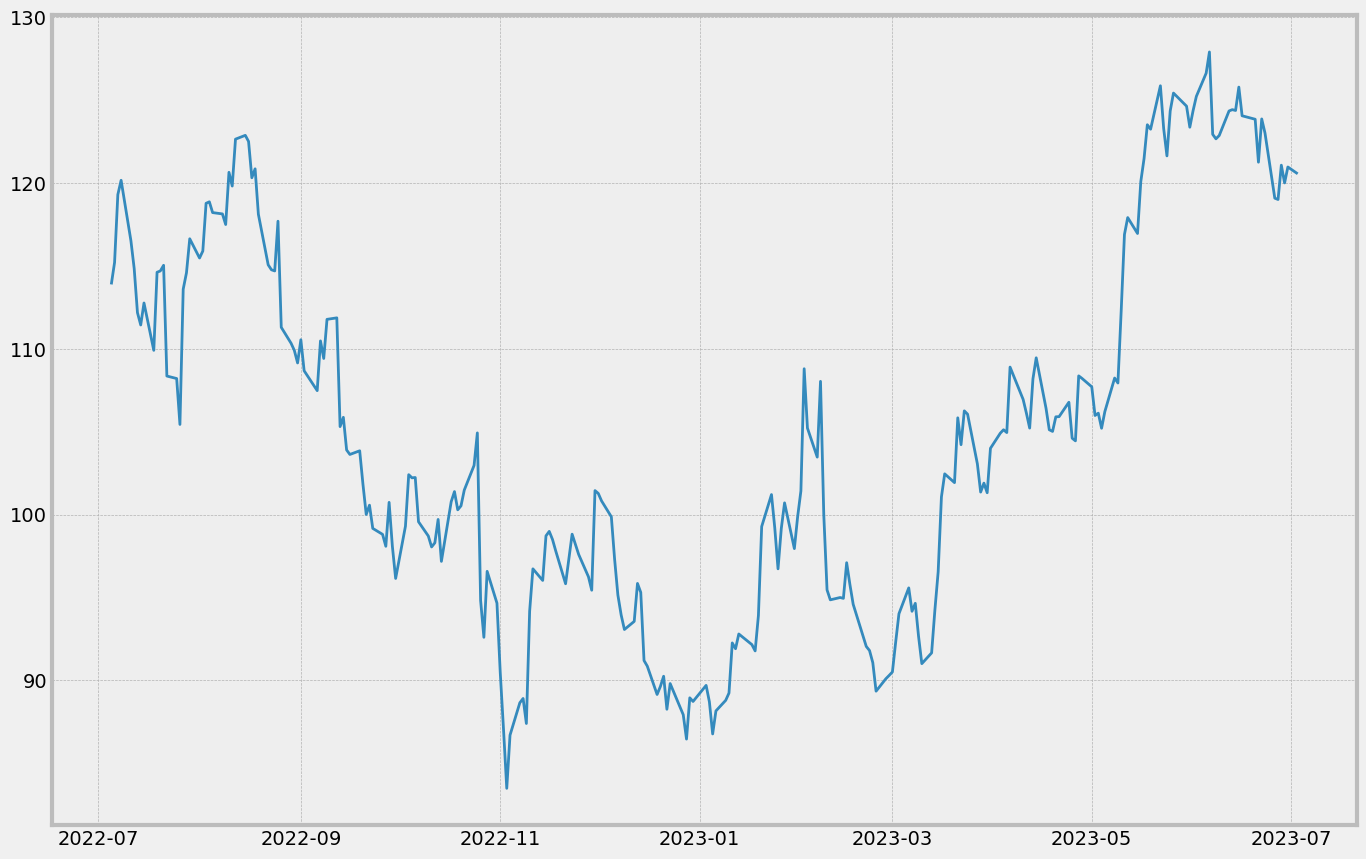

In [36]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

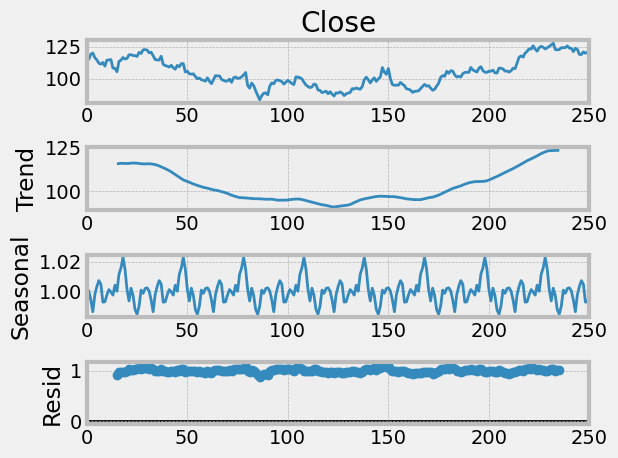

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

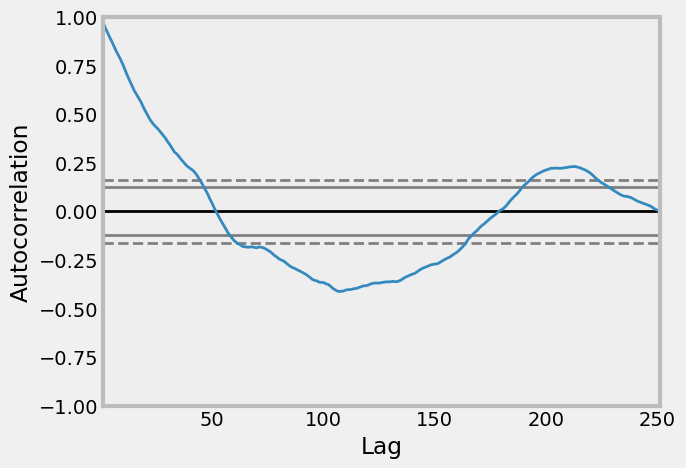

In [38]:
pd.plotting.autocorrelation_plot(data["Close"])

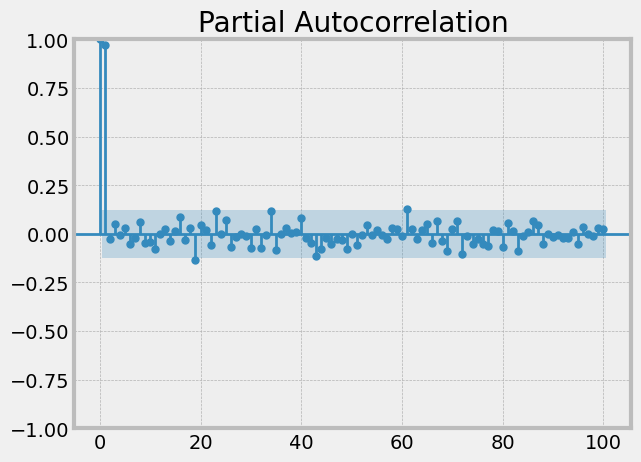

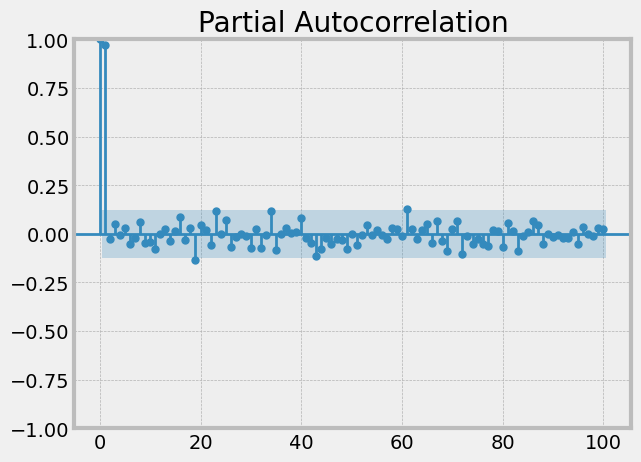

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags=100, method='ywm')

In [25]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p,d,q))
fitted = model.fit()

print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -570.805
Date:                Wed, 05 Jul 2023   AIC                           1157.611
Time:                        16:31:08   BIC                           1185.782
Sample:                             0   HQIC                          1168.949
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0841      1.450      0.058      0.954      -2.758       2.927
ar.L2          0.7106      1.485      0.478      0.632      -2.201       3.622
ar.L3         -0.0221      0.163     -0.136      0.8

In [26]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      113.887002
2      115.215873
3      119.190918
4      119.748882
          ...    
246    119.066508
247    119.407981
248    121.151201
249    119.837587
250    121.016863
Name: predicted_mean, Length: 251, dtype: float64


In [27]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HerbyHerb\.conda\envs\tf_new\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -556.532
Date:                            Wed, 05 Jul 2023   AIC                           1143.065
Time:                                    16:31:39   BIC                           1195.149
Sample:                                         0   HQIC                          1164.056
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1885      0.395     -0.477      0.633      -0.963       0.586
ar.L2         -0.7698      0.378   

In [28]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

251    121.499750
252    122.043482
253    122.720445
254    122.409048
255    121.722048
256    120.979876
257    121.222904
258    121.877894
259    122.243306
260    122.759326
261    123.000898
262    124.121778
263    126.619623
264    126.204643
265    125.856862
266    126.157104
267    126.752926
268    127.128391
269    126.134385
270    126.850977
271    126.517934
272    126.734079
273    127.241742
274    127.776566
275    128.270597
276    127.469176
277    128.472126
278    128.067053
279    128.452386
280    127.988609
281    126.488726
Name: predicted_mean, dtype: float64


<Axes: >

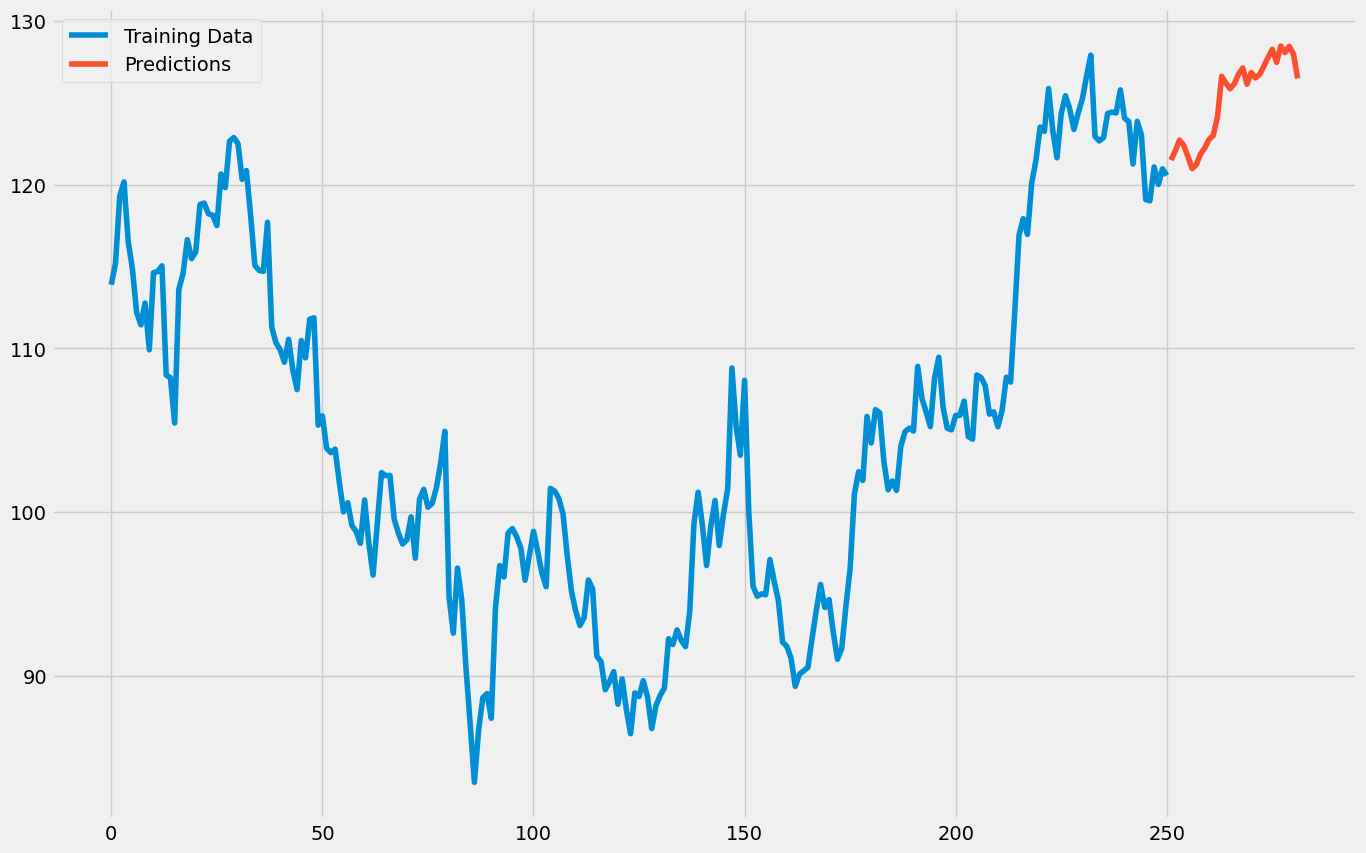

In [29]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [30]:
print(data.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2022-07-05  107.514503  114.052597  106.249496  113.887001  113.887001   
1 2022-07-06  114.092003  116.351997  112.250504  115.213501  115.213501   
2 2022-07-07  116.008003  119.862000  115.533997  119.306000  119.306000   
3 2022-07-08  117.550003  120.434998  117.514000  120.168503  120.168503   
4 2022-07-11  118.650002  118.794502  116.234497  116.522499  116.522499   

     Volume  
0  36398000  
1  28852000  
2  32184000  
3  29082000  
4  26718000  


In [32]:
# Ihre bisheriger Code...

# Vorhersagen für die nächsten 30 Tage erhalten
predictions = model.predict(len(data), len(data) + 29)  # 30 Tage Vorhersagen

# Daten für die nächsten 30 Tage generieren
future_dates = pd.date_range(start=data['Date'].iloc[-1] + timedelta(days=1), periods=30)

# Ein DataFrame für die Vorhersagen erstellen
df_predictions = pd.DataFrame({
    'Date': future_dates,
    'Close': predictions
})

# DataFrame erweitern, indem Sie die Vorhersagen anhängen
data_extended = pd.concat([data, df_predictions])

print(data_extended)

          Date        Open        High         Low       Close   Adj Close  \
0   2022-07-05  107.514503  114.052597  106.249496  113.887001  113.887001   
1   2022-07-06  114.092003  116.351997  112.250504  115.213501  115.213501   
2   2022-07-07  116.008003  119.862000  115.533997  119.306000  119.306000   
3   2022-07-08  117.550003  120.434998  117.514000  120.168503  120.168503   
4   2022-07-11  118.650002  118.794502  116.234497  116.522499  116.522499   
..         ...         ...         ...         ...         ...         ...   
276 2023-07-29         NaN         NaN         NaN  127.469176         NaN   
277 2023-07-30         NaN         NaN         NaN  128.472126         NaN   
278 2023-07-31         NaN         NaN         NaN  128.067053         NaN   
279 2023-08-01         NaN         NaN         NaN  128.452386         NaN   
280 2023-08-02         NaN         NaN         NaN  127.988609         NaN   

         Volume  
0    36398000.0  
1    28852000.0  
2    3218

<Axes: >

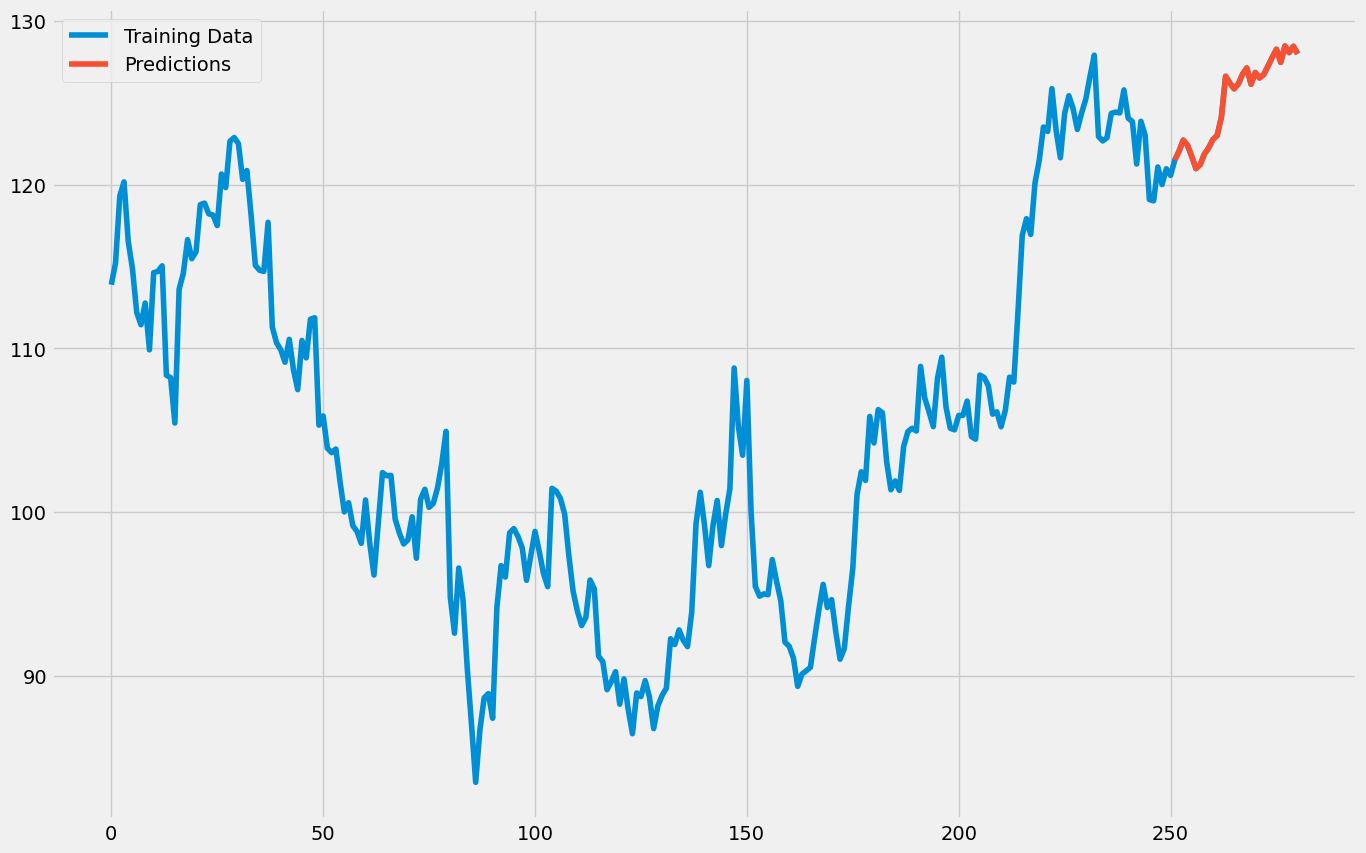

In [34]:
data_extended["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

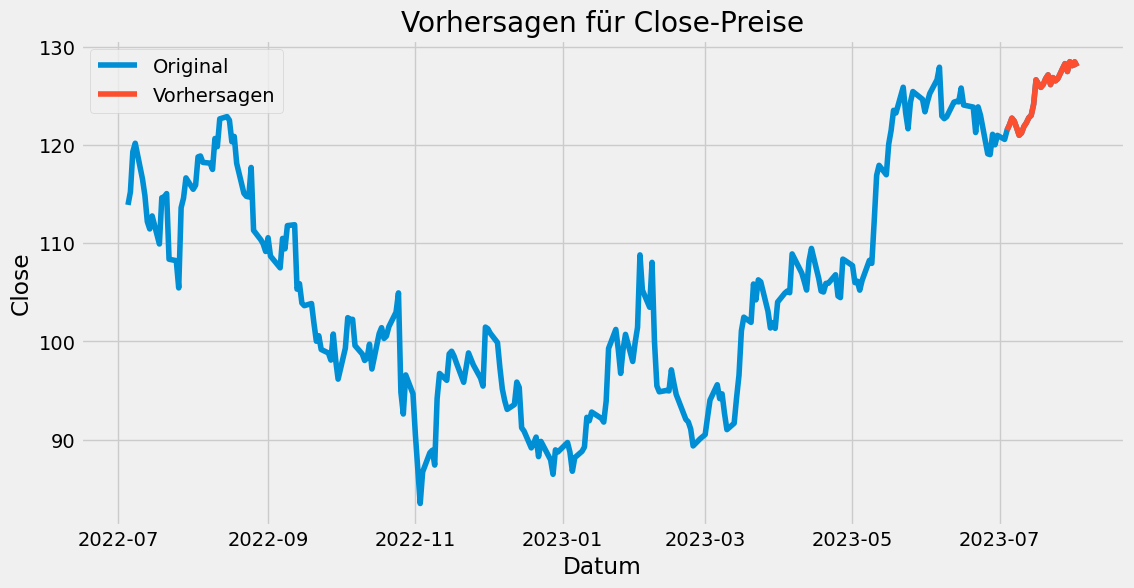

In [35]:
import matplotlib.pyplot as plt

# Ihre bisheriger Code...

# DataFrame erweitern, indem Sie die Vorhersagen anhängen
data_extended = pd.concat([data, df_predictions])

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(data_extended['Date'], data_extended['Close'], label='Original')
plt.plot(data_extended['Date'].tail(30), data_extended['Close'].tail(30), label='Vorhersagen')
plt.xlabel('Datum')
plt.ylabel('Close')
plt.title('Vorhersagen für Close-Preise')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Berechnen Sie die Metriken für die Vorhersagen
mae = mean_absolute_error(data_extended['Close'].tail(30), predictions)
mse = mean_squared_error(data_extended['Close'].tail(30), predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [43]:
# Importieren der notwendigen Bibliotheken
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [44]:
# Daten vorbereiten
data_lstm = data["Close"].values
data_lstm = data_lstm.reshape(-1,1)

In [45]:
# Skalieren der Daten
scaler = MinMaxScaler(feature_range=(0, 1))
data_lstm = scaler.fit_transform(data_lstm)

In [46]:
# Aufteilung in Trainings- und Testset
train_data, test_data = train_test_split(data_lstm, test_size=0.2, shuffle=False)


In [47]:
# Funktion um das Dataset in passendes Format zu bringen
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [48]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [49]:
# LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [50]:
# Modell trainieren
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
198/198 - 3s - loss: 0.0605 - 3s/epoch - 13ms/step
Epoch 2/100
198/198 - 0s - loss: 0.0163 - 291ms/epoch - 1ms/step
Epoch 3/100
198/198 - 0s - loss: 0.0094 - 281ms/epoch - 1ms/step
Epoch 4/100
198/198 - 0s - loss: 0.0053 - 271ms/epoch - 1ms/step
Epoch 5/100
198/198 - 0s - loss: 0.0036 - 271ms/epoch - 1ms/step
Epoch 6/100
198/198 - 0s - loss: 0.0033 - 303ms/epoch - 2ms/step
Epoch 7/100
198/198 - 0s - loss: 0.0032 - 301ms/epoch - 2ms/step
Epoch 8/100
198/198 - 0s - loss: 0.0033 - 281ms/epoch - 1ms/step
Epoch 9/100
198/198 - 0s - loss: 0.0033 - 291ms/epoch - 1ms/step
Epoch 10/100
198/198 - 0s - loss: 0.0033 - 279ms/epoch - 1ms/step
Epoch 11/100
198/198 - 0s - loss: 0.0033 - 271ms/epoch - 1ms/step
Epoch 12/100
198/198 - 0s - loss: 0.0033 - 271ms/epoch - 1ms/step
Epoch 13/100
198/198 - 0s - loss: 0.0033 - 271ms/epoch - 1ms/step
Epoch 14/100
198/198 - 0s - loss: 0.0033 - 282ms/epoch - 1ms/step
Epoch 15/100
198/198 - 0s - loss: 0.0034 - 273ms/epoch - 1ms/step
Epoch 16/100
198/198 

In [51]:
# Anwendung des Modells für Vorhersagen
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 0s/step


In [52]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

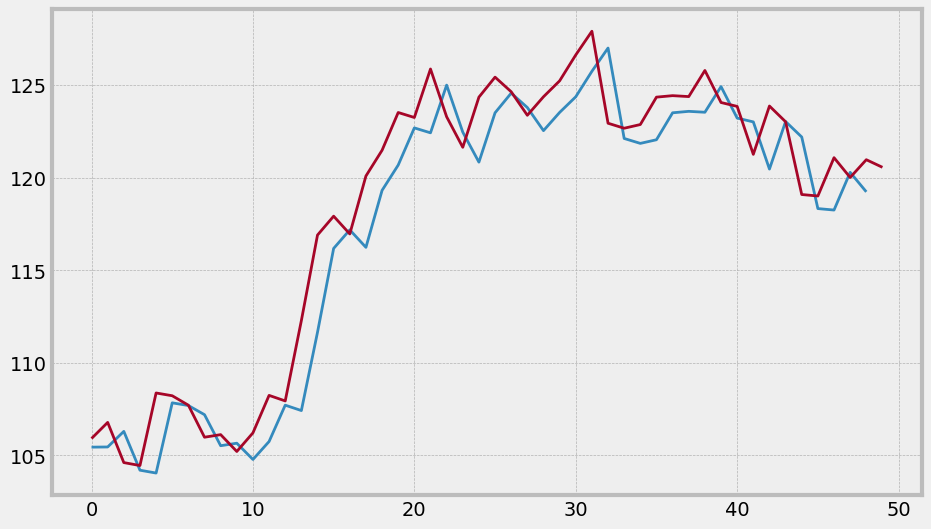

In [53]:
# Plotten der Vorhersagen
plt.figure(figsize=(10,6))
plt.plot(testPredict)
plt.plot(scaler.inverse_transform(test_data[1:]))
plt.show()

In [54]:
# Importieren der notwendigen Bibliotheken
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [55]:
# Daten vorbereiten
data_lstm = data["Close"].values
data_lstm = data_lstm.reshape(-1,1)

In [56]:
# Skalieren der Daten
scaler = MinMaxScaler(feature_range=(0, 1))
data_lstm = scaler.fit_transform(data_lstm)

In [57]:
# Funktion um das Dataset in passendes Format zu bringen
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [58]:
look_back = 1
X, Y = create_dataset(data_lstm, look_back)

In [59]:
# reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [60]:
# LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
# Modell trainieren
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
249/249 - 2s - loss: 0.0723 - 2s/epoch - 9ms/step
Epoch 2/100
249/249 - 0s - loss: 0.0153 - 352ms/epoch - 1ms/step
Epoch 3/100
249/249 - 0s - loss: 0.0066 - 341ms/epoch - 1ms/step
Epoch 4/100
249/249 - 0s - loss: 0.0036 - 342ms/epoch - 1ms/step
Epoch 5/100
249/249 - 0s - loss: 0.0032 - 333ms/epoch - 1ms/step
Epoch 6/100
249/249 - 0s - loss: 0.0031 - 333ms/epoch - 1ms/step
Epoch 7/100
249/249 - 0s - loss: 0.0031 - 364ms/epoch - 1ms/step
Epoch 8/100
249/249 - 0s - loss: 0.0031 - 382ms/epoch - 2ms/step
Epoch 9/100
249/249 - 0s - loss: 0.0033 - 372ms/epoch - 1ms/step
Epoch 10/100
249/249 - 0s - loss: 0.0032 - 352ms/epoch - 1ms/step
Epoch 11/100
249/249 - 0s - loss: 0.0031 - 342ms/epoch - 1ms/step
Epoch 12/100
249/249 - 0s - loss: 0.0031 - 432ms/epoch - 2ms/step
Epoch 13/100
249/249 - 0s - loss: 0.0032 - 442ms/epoch - 2ms/step
Epoch 14/100
249/249 - 0s - loss: 0.0031 - 400ms/epoch - 2ms/step
Epoch 15/100
249/249 - 0s - loss: 0.0031 - 339ms/epoch - 1ms/step
Epoch 16/100
249/249 -

In [62]:
# Anwendung des Modells für Vorhersagen
def predict_future_days(model, data, future_days):
    prediction_list = data[-look_back:]
    
    for _ in range(future_days):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

future_days = 30
forecast = predict_future_days(model, data_lstm, future_days)
forecast = scaler.inverse_transform(forecast.reshape(-1,1))

1/1 [==============================] - 0s 16ms/step


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_11636\1973302310.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=data["Date"].iloc[-1], periods=future_days+1, closed='right'), forecast, label='Vorhersage für die nächsten 30 Tage')


ValueError: x and y must have same first dimension, but have shapes (30,) and (31, 1)

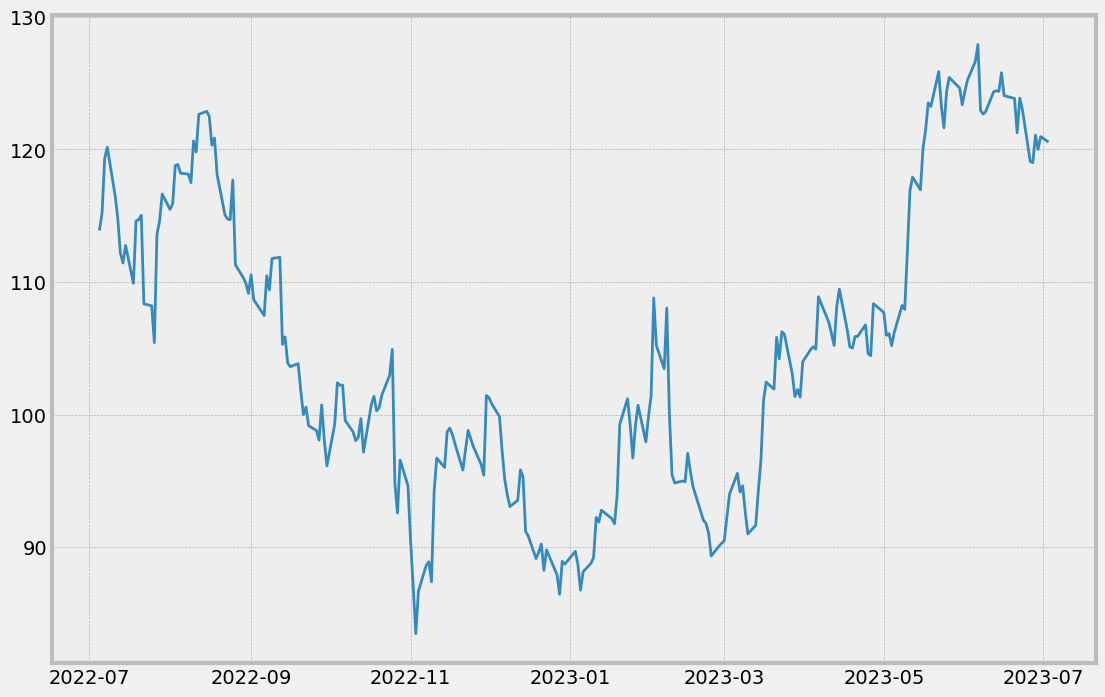

In [64]:
# Plotten der Vorhersagen
plt.figure(figsize=(12,8))
plt.plot(data["Date"], data["Close"], label='Historische Daten')
plt.plot(pd.date_range(start=data["Date"].iloc[-1], periods=future_days+1, closed='right'), forecast, label='Vorhersage für die nächsten 30 Tage')
plt.title('Google Aktien Preisvorhersage')
plt.xlabel('Zeit')
plt.ylabel('Preis')
plt.legend()
plt.show()

In [65]:
future_days = 30
forecast = predict_future_days(model, data_lstm, future_days)
forecast = scaler.inverse_transform(forecast.reshape(-1,1))

forecast_dates = pd.date_range(start=data["Date"].iloc[-1], periods=future_days+1, closed='right')

forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
print(forecast_df)


1/1 [==============================] - 0s 16ms/step


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_11636\2647630044.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data["Date"].iloc[-1], periods=future_days+1, closed='right')


ValueError: Shape of passed values is (31, 1), indices imply (30, 1)

In [66]:
forecast_dates = pd.date_range(start=data["Date"].iloc[-1], periods=future_days, closed='right')

forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
print(forecast_df)


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_11636\226513793.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=data["Date"].iloc[-1], periods=future_days, closed='right')


ValueError: Shape of passed values is (31, 1), indices imply (29, 1)